This example is taken from PyTorch tutorial: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Here you download a training sample of the CIFAR10 dataset and train the neural network described in the `my_nn_model.py` file. The trained model's weights will be saved to the `cifar_net.pth` file in the project storage.

In [21]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from my_nn_model import Net

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


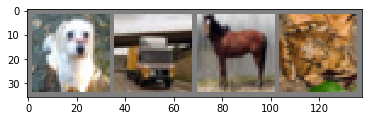

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [11]:
#!g1.1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = Net()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

device(type='cuda')

In [14]:
#!g1.1
for epoch in range(5): 
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.189
[1,  4000] loss: 1.908
[1,  6000] loss: 1.712
[1,  8000] loss: 1.617
[1, 10000] loss: 1.538
[1, 12000] loss: 1.459
[2,  2000] loss: 1.396
[2,  4000] loss: 1.371
[2,  6000] loss: 1.356
[2,  8000] loss: 1.321
[2, 10000] loss: 1.294
[2, 12000] loss: 1.273
Finished Training


In [15]:
#!g1.1
torch.save(net.state_dict(), './cifar_net.pth')